<a href="https://colab.research.google.com/github/AnnaBo1/python_for_DA/blob/main/%22Analysis_on_Yulu_data%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('yulu_rental.csv')

Dataset column profile:

*   **datetime**: The date and time are collected hourly
*   **season**: season (1: spring, 2: summer, 3: autumn, 4: winter)
*   **holiday:** whether the day is a holiday (retrieved from http://dchr.dc.gov/page/holiday-schedule)
*   **workingday**: if the day is not a weekend or holiday, it is marked as 1, otherwise - 0.
*   **weather**:
1.   Clear, Partly cloudy, partly cloudy
2.   Fog + Cloudy, Fog + Broken clouds, Fog + Partly cloudy, Fog
3.   Light snow, Light rain + Thunderstorm + Scattered clouds, Light rain + Scattered clouds
4.   Heavy Rain + Ice Balls + Thunderstorm + Fog, Snow + Fog
*   **temp**: temperature in degrees Celsius
*   **atemp**: how the temperature feels in degrees Celsius
*   **humidity**: humidity
*   **windspeed**: wind speed
*   **casual**: number of informal users
*   **registered**: number of registered users
*   **count**: total number of bikes rented, including informal and registered users


In [2]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**1. What effect do the holidays have on the number of rental bikes?**


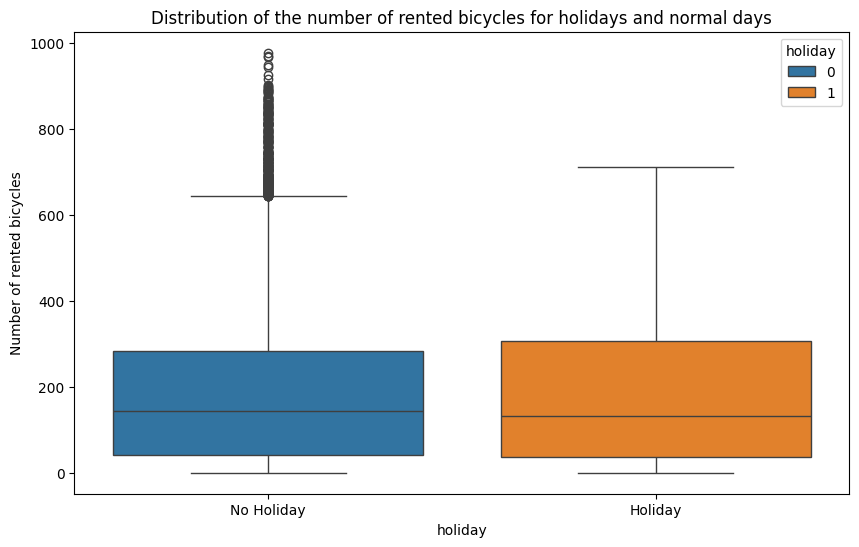

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='holiday', y='count', hue='holiday')
plt.title('Distribution of the number of rented bicycles for holidays and normal days')
plt.ylabel('Number of rented bicycles')
plt.xticks(ticks=[0, 1], labels=['No Holiday', 'Holiday'])
plt.show()

**No Holiday:**
The mean (median) is around 200 bikes.
There is a significant amount of emissions (values ​​well in excess of the main mass) where the number of rental bikes can reach 800 or more.

**Holiday:**
The median for holidays is slightly lower than for normal days, at just under 200 bikes.
The scatter in the data is also smaller than on normal days, suggesting a more stable (less variable) number of bike rentals during holidays.
There are no or almost no emissions that were typical for normal days.

**Conclusion:**
Holidays, in general, do not increase the number of rental bikes, but instead lead to a slightly lower median and a smaller spread. That is, during the holidays, the number of rented bicycles is more stable and smaller than on normal days.

**Recommendations:**
- Launch special promotions for the holidays. Since demand is lower, users can be incentivized through discounts, bonuses, or holiday promotions.
- Offer holiday packages or long-term rentals for people who plan to use their bikes heavily during the festive period.
- Focus on family and group activities during the holidays, such as organizing bike tours or cycling-related events.

**2.   What is the dependence of the number of rented bicycles on the perceived temperature (atemp) under different weather conditions (weather)?**

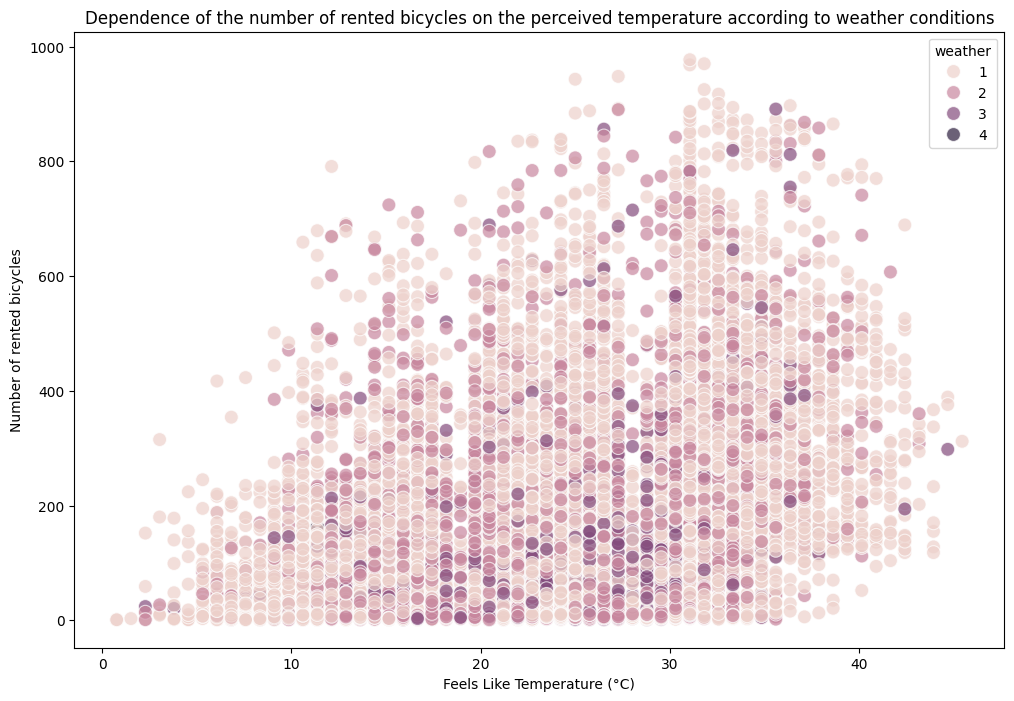

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='atemp', y='count', hue='weather', alpha=0.7, s=100)
plt.title('Dependence of the number of rented bicycles on the perceived temperature according to weather conditions')
plt.xlabel('Feels Like Temperature (°C)')
plt.ylabel('Number of rented bicycles')
plt.show()

The number of rental bikes increases as the temperature rises. This is especially noticeable when the temperature rises to the range of 20-30°C.
At very low temperatures (0-10°C), the number of rental bikes is much smaller.

Influence of different weather conditions:

- Weather 1 (Clear, Partly Cloudy): A large number of rental bikes are seen in a variety of temperatures, especially in the 10-30°C range. Such weather has the greatest effect on the number of rentals, in clear weather, bicycles are most often rented.
- Weather 2 (fog, cloudy): the number of bicycles is also significant, but slightly less than in the case of clear weather. Maximum profitability is achieved at a temperature of about 20-25°C.
- Weather 3 (light snow, light rain): under these weather conditions, there is a decrease in the number of rentals. People rent bikes even in bad weather, but the total number is less.
- Weather 4 (heavy rain, snow): this is the most unfavorable weather conditions. The number of rental bicycles is significantly reduced, and in this case, rental is rarely observed, even at a moderately comfortable temperature.

Conclusion:

Favorable weather conditions, such as clear or partly cloudy weather, significantly increase the number of rental bikes, especially in comfortable temperatures (around 20-30°C). Under adverse conditions (rain, snow, fog), the number of rentals is noticeably reduced, even if the temperature is comfortable for driving.

Recommendations:

- Develop a forecasted discount system that adjusts rental prices depending on the weather. For example, discounts on rainy or cold days can encourage rentals even in less comfortable weather conditions.
- Invest in protective gear for rainy or cold days (eg raincoats, gloves, seat covers) and offer it with bikes to reduce the impact of weather on rental numbers.
- Promote the rental on good days through special messages, mobile applications or social networks, warning customers about favorable weather for trips.

**3.  How does the season affect the number of bicycle rentals (count) depending on the temperature (temp) and humidity (humidity)?**

In [15]:
filtered_df = df[['season', 'temp', 'humidity', 'count']]
filtered_df

,season,temp,humidity,count
0,1,9.84,81,16
1,1,9.02,80,40
2,1,9.02,80,32
3,1,9.84,75,13
4,1,9.84,75,1
...,...,...,...,...
10881,4,15.58,50,336
10882,4,14.76,57,241
10883,4,13.94,61,168
10884,4,13.94,61,129


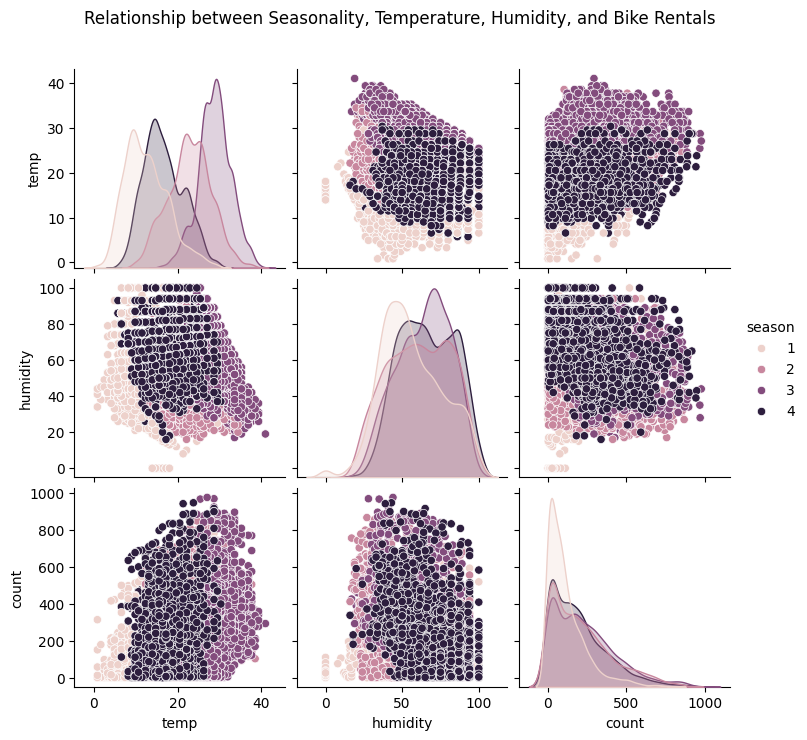

In [16]:
sns.pairplot(filtered_df, hue='season')
plt.suptitle('Relationship between Seasonality, Temperature, Humidity, and Bike Rentals')
plt.subplots_adjust(top=0.9)
plt.show()

The effect of seasons on bicycle rentals (count):

- Summer (Season 2) and Autumn (Season 3) show the highest number of bike rentals, especially when temperatures approach 20-30°C. This shows that these seasons are the most favorable for cyclists.
- Spring (Season 1) shows slightly lower rental rates compared to Summer and Fall, but still performs well, especially in comfortable temperatures.
- Winter (Season 4) shows the lowest rental figures. This is understandable, as low temperatures and weather conditions in winter are less favorable for cycling.

Relationship between temperature (temp) and number of rolls (count):

- The number of rolls increases significantly with increasing temperature, reaching a peak at temperatures of 20-30°C. This is the most comfortable range for driving.
- In winter (season 4), even with moderately warm temperatures, the number of rentals remains low, which is probably due to other factors (shorter daylight hours, adverse weather conditions).
- At low temperatures (0-10°C) in all seasons, the number of rentals is low, especially in winter.

Influence of humidity (humidity):

- Humidity does not have such a strong influence on the number of rolls as temperature. Rolling takes place at different levels of humidity.
- In the summer and autumn seasons, there are more rentals at average humidity (about 50-70%).
- With very high humidity (90-100%), the number of rentals decreases, probably due to uncomfortable weather conditions (wet, rain).

Conclusion:

- The most favorable seasons for renting bicycles are summer and autumn, especially with temperatures around 20-30°C and average humidity.
- Winter is the least favorable season for car rentals, even if the temperature is relatively comfortable.
- Humidity has a moderate effect, and rolling occurs most often at medium humidity levels.

Recommendations:

- Launch season tickets for the summer and fall periods when demand is highest. This may include discounts on long-term rentals for those who borrow bikes for several months.
-Focus on winter promotions: offer significant discounts or special rental conditions during winter to attract customers even in cooler temperatures. You may also want to consider renting other types of vehicles (e.g. electric scooters).
-Schedule maintenance during the off-season (winter, early spring) when demand is lowest.